In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter(action="ignore")
sns.set_theme(palette=sns.color_palette("muted"), style="darkgrid")

In [57]:
data = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')

In [58]:
data.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
13765,Taniya,(1987),NaN,Romance,NaN,NaN,Ramprasad Chakraborty,Mina Chakraborty,Dipankar Dey,Neena Gupta
5576,Hatya,(1988),151 min,"Action, Crime, Drama",6.9,390,Kirti Kumar,Govinda,Neelam Kothari,Raj Kiran
9524,Mounie,(1995),NaN,Comedy,NaN,NaN,Nitin Auditcha,Dev Burman,Vikram Chanpura,Girish Patel
3148,Chura Liyaa Hai Tumne,(2003),143 min,"Action, Drama, Mystery",3.7,463,Sangeeth Sivan,Zayed Khan,Esha Deol,Gulshan Grover
7221,Kalyug Aur Ramayan,(1987),NaN,Drama,4.4,53,Babubhai Mistry,Manoj Kumar,Rajiv Goswami,Madhavi


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Data Cleaning

In [60]:
na_pourcentage = data.isna().sum() / data.shape[0] * 100
na_pourcentage

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

## Removing NaN values

In [61]:
data.dropna(subset=data.columns[1:], inplace=True)

In [62]:
data = data.dropna().reset_index(drop=True)

In [63]:
data.shape

(5659, 10)

## Changing duration and votes to numeric values

In [64]:
data['Duration'] = data['Duration'].str.replace(' min', '').astype(int)
data['Duration']

0       109
1       110
2       147
3       142
4        82
       ... 
5654    115
5655    153
5656    125
5657    129
5658    130
Name: Duration, Length: 5659, dtype: int32

In [65]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

In [66]:
data['Votes']

0          8
1         35
2        827
3       1086
4        326
        ... 
5654     408
5655    1496
5656      44
5657     655
5658      20
Name: Votes, Length: 5659, dtype: int32

In [67]:
data.shape

(5659, 10)

In [68]:
data.duplicated(subset=["Name", "Year"]).sum()

2

In [69]:
data = data.drop_duplicates(
    keep="first", subset=["Name", "Year"]).reset_index(drop=True)

In [70]:
data['Year'].value_counts()

(2019)    227
(2017)    211
(2018)    202
(2015)    176
(2016)    173
         ... 
(1931)      2
(1939)      2
(1934)      2
(1933)      1
(1932)      1
Name: Year, Length: 91, dtype: int64

In [71]:
data["Year"] = data.loc[:, "Year"].str.extract(r"(\d{4})")
data["Year"] = pd.to_numeric(data.loc[:, "Year"])

In [72]:
data['Year'].value_counts()

2019    227
2017    211
2018    202
2015    176
2016    173
       ... 
1931      2
1939      2
1934      2
1933      1
1932      1
Name: Year, Length: 91, dtype: int64

In [73]:
data["Genre"] = data.loc[:, "Genre"].str.replace("Musical", "Music")

In [74]:
data['Genre'].value_counts()

Drama                            844
Drama, Romance                   332
Action, Crime, Drama             328
Action, Drama                    206
Comedy, Drama                    205
                                ... 
Animation, Comedy, Drama           1
Family, Drama, Thriller            1
Action, Music, War                 1
Action, Fantasy, Horror            1
Documentary, Biography, Music      1
Name: Genre, Length: 363, dtype: int64

In [75]:
data['Main_Genre'] = data['Genre'].str.split(',').str[0]

In [76]:
data['Main_Genre'].value_counts()

Drama          1842
Action         1651
Comedy          989
Crime           271
Romance         159
Horror          128
Adventure       105
Music            93
Thriller         89
Biography        83
Mystery          59
Family           52
Documentary      48
Animation        40
Fantasy          31
History           8
Sci-Fi            4
War               3
Sport             2
Name: Main_Genre, dtype: int64

In [77]:
data.describe()

,Year,Duration,Rating,Votes
count,5657.000000,5657.00000,5657.000000,5657.00000
mean,1996.254198,133.44087,5.897967,2698.59802
std,19.729583,25.32374,1.381035,13653.82378
min,1931.000000,21.00000,1.100000,5.00000
25%,1983.000000,119.00000,5.000000,30.00000
50%,2002.000000,135.00000,6.100000,131.00000
75%,2013.000000,150.00000,6.900000,923.00000
max,2021.000000,321.00000,10.000000,591417.00000


In [78]:
data.shape

(5657, 11)

In [79]:
data = data[(np.abs(stats.zscore(data[['Rating','Votes','Duration']])) < 3).all(axis=1)]

In [80]:
data.shape

(5545, 11)

# Univariate analysis
def: Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

In [81]:
iplot(px.violin(data_frame=data,x="Rating"))

In [82]:
iplot(px.violin(data_frame=data,x="Duration"))

In [83]:
iplot(px.violin(data_frame=data,x="Votes"))

* Rating and duration are pretty much normally distributed
* Votes are right skewed and has alot of outliers but we cannot remove them

## Distribution of movies across Genres

In [84]:
data.Genre.value_counts().reset_index()

,index,Genre
0,Drama,833
1,"Drama, Romance",325
2,"Action, Crime, Drama",324
3,"Action, Drama",202
4,"Comedy, Drama",198
...,...,...
355,"History, Romance",1
356,"Drama, History, Sport",1
357,"Animation, Comedy, Drama",1
358,"Family, Drama, Thriller",1


In [85]:
genres = data.Main_Genre.value_counts().reset_index()
genres

,index,Main_Genre
0,Drama,1813
1,Action,1615
2,Comedy,968
3,Crime,265
4,Romance,157
5,Horror,127
6,Adventure,101
7,Music,90
8,Thriller,89
9,Biography,77


In [86]:
# plot a pie that dimonstrates the dnumber of movies per genre
fig = px.pie(genres, values='Main_Genre', names='index' , title='Movies per Genre')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* top 3 genres are Drama, Comedy and Action

## Multuvariate analysis

#Which genre has the highest rating?

In [87]:
rating_by_genre= data.groupby('Main_Genre')['Rating'].mean().sort_values(ascending=False).reset_index()

In [88]:
iplot(px.bar(rating_by_genre, x='Main_Genre', y='Rating', title='Average Rating per Genre'))

* Documentary has the highest rating

## Distribution of movies over time

In [89]:
data["Year"].value_counts().reset_index().sort_values(by="Year", ascending=False)

,index,Year
0,2019,224
1,2017,207
2,2018,192
3,2015,171
4,2016,168
...,...,...
85,1945,3
86,1931,2
87,1939,2
88,1934,2


In [90]:
movies_by_year = data["Year"].value_counts().reset_index().sort_values(by="Year")


In [91]:
iplot(px.line(data_frame=movies_by_year,x="Year",y="index",title="Number of Movies over the years",\
              color_discrete_sequence=["green"]))

* Number of movies have increased over time peaking in 2019 wiht 224 movies

## Rating  and number of votes  over the years

In [92]:
Rating_by_years = data.groupby("Year").agg({"Rating":"mean","Votes":"sum"}).reset_index()

In [93]:
Rating_by_years

,Year,Rating,Votes
0,1931,5.750000,118
1,1933,6.200000,12
2,1934,5.600000,17
3,1935,5.700000,89
4,1936,5.885714,264
...,...,...,...
85,2017,5.998551,519043
86,2018,6.133854,651092
87,2019,6.253125,607584
88,2020,6.168702,440999


In [94]:
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Rating",markers=True,color_discrete_sequence=["red"],height=400))

In [95]:
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Votes",markers=True,color_discrete_sequence=["green"],height=400))

* While Rating is higher in the earlier years, number of votes are extremely low compared to the recent years (after 2000)
* Votes started increasing after 1990 to almost double in next year and peaked in 2018

In [96]:
# top 10 Rated function
def top_10(col):
    return data.groupby(col)["Rating"].agg(["mean","count"])\
    .query("count >=10")\
    .sort_values(by="mean",ascending=False)[:10]\
    .reset_index()

In [97]:
# top 10 Rated Directors
top_10_directors = top_10("Director")
iplot(px.bar(top_10_directors,x="Director",y="mean",title="Top 10 Rated Directors",text="count",labels={"mean":"Average Rating"}))


In [98]:
# top 10 Rated Actors1
top_10_actors1 = top_10("Actor 1")
iplot(px.bar(top_10_actors1,x="Actor 1",y="mean",title="Top 10 Rated Actor1",text="count",labels={"mean":"Average Rating"}))

In [99]:
top_10_actors2 = top_10("Actor 2")

iplot(px.bar(data_frame=top_10_actors2,x="Actor 2",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 secondary actors with more than 10 movies by rating"))

In [100]:
top_10_actors3 = top_10("Actor 3")

iplot(px.bar(data_frame=top_10_actors3,x="Actor 3",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 Third main actors with more than 10 movies by rating"))

# Importing libraries for machine learning and transforming data

In [101]:
from sklearn.model_selection import train_test_split,cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics
import scikitplot as skplt
import category_encoders as ce

In [102]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median absolute error: ',round(median_absolute_error,4))

## Dropping uncessacry columns and splitting data into x and y

In [103]:
data = data.drop(columns=["Name","Main_Genre"])

In [104]:
X = data.drop(columns=["Rating"])
y = data["Rating"]

# Encoding data using JamesSteinEncoder
JamesSteinEncoder is a target-based encoder that is inspired by the James-Stein estimator. It is a shrinkage estimator that minimizes the mean squared error of the estimates. It is a powerful encoder that can help improve the performance of your models.

In [105]:
encoder = ce.JamesSteinEncoder(return_df=True)

In [106]:
encoder.fit(X,y)
X = encoder.transform(X)

In [107]:
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,6.190741,8,7.000000,6.827112,7.000000,7.000000
1,2019,110,5.792333,35,4.400000,5.598501,4.400000,4.453861
2,1997,147,5.978972,827,5.590219,5.246126,5.774658,5.878363
3,2005,142,6.401041,1086,7.173496,5.653301,6.702394,6.198561
4,2012,82,5.706343,326,5.600000,5.600000,5.884089,5.600000
...,...,...,...,...,...,...,...,...
5652,2015,115,6.190741,408,6.100000,6.126083,6.100000,5.852186
5653,2001,153,6.570957,1496,6.968314,5.248634,5.844167,5.789483
5654,1989,125,5.801954,44,6.203445,6.208974,5.800000,6.016249
5655,1999,129,5.676591,655,5.375500,5.582148,4.911970,5.803593


# Normalizing data using Robust scaler

In [108]:
scaler = RobustScaler()
scaler.fit(X)
X.loc[:,:] = scaler.transform(X.loc[:,:])

In [109]:
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.580645,-0.838710,0.625425,-0.141657,1.049219,1.058406,1.166050,1.244936
1,0.580645,-0.806452,-0.167667,-0.109244,-1.479828,-0.378927,-1.662776,-1.689504
2,-0.129032,0.387097,0.203867,0.841537,-0.322090,-0.791165,-0.167134,-0.047758
3,0.129032,0.225806,1.044060,1.152461,1.217981,-0.314818,0.842252,0.321273
4,0.354839,-1.709677,-0.338843,0.240096,-0.312576,-0.377173,-0.048072,-0.368572
...,...,...,...,...,...,...,...,...
5652,0.451613,-0.645161,0.625425,0.338535,0.173780,0.238283,0.186841,-0.077927
5653,0.000000,0.580645,1.382303,1.644658,1.018398,-0.788231,-0.091508,-0.150192
5654,-0.387097,-0.322581,-0.148515,-0.098439,0.274402,0.335256,-0.139562,0.111157
5655,-0.064516,-0.193548,-0.398070,0.635054,-0.530949,-0.398058,-1.105747,-0.133931


# Training XGBoost model

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [111]:
xgb_model = XGBRegressor(objective ='reg:squarederror',gamma=0.09,learning_rate=0.08,subsample=0.7)

In [112]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluating XGBoost model

In [113]:
xgb_model.score(X_train,y_train)

0.9303447793703494

In [114]:
xgb_model.score(X_test,y_test)

0.858351669095752

In [115]:
y_pred = xgb_model.predict(X_test)
print(f"Report:Lgbm model")
print(f"{regression_results(y_test, y_pred)}\n")

Report:Lgbm model
explained_variance:  0.8584
mean_squared_log_error:  0.0064
r2:  0.8584
MAE:  0.3425
MSE:  0.2459
RMSE:  0.4959
Median absolute error:  0.2255
None



In [116]:
score = cross_val_score(xgb_model,X,y,cv=10)
avg = np.mean(score)
print(f"cross validation score for XGBoost:{score}")
print(f"average cross validation score for XGBoost:{avg}\n")

cross validation score for XGBoost:[0.84958444 0.85796474 0.86210572 0.86311445 0.86657358 0.86424627
 0.85113039 0.84348962 0.82976873 0.88102786]
average cross validation score for XGBoost:0.8569005800073872



## Feature importances by the model

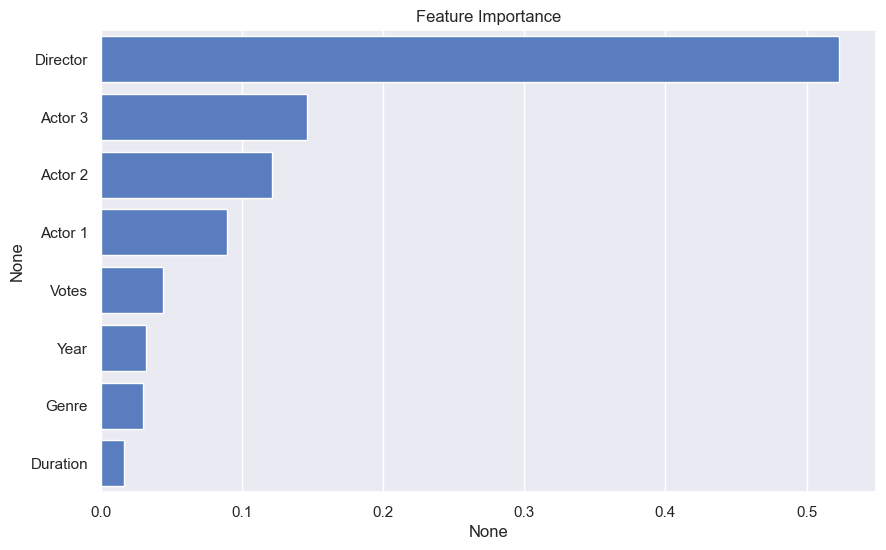

In [118]:
fs = pd.Series(xgb_model.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=fs,y=fs.index)
plt.title("Feature Importance")
plt.show()


# Here we try to predict new data we chose data close to row 10 of the head

In [120]:
data.head(15)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1997,147,"Comedy, Drama, Music",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
5,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
6,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
7,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
8,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
9,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [121]:
new_data = pd.DataFrame({'Year':[2015],'Duration':[115],\
                         'Genre':'Comedy,Drama','Votes':[7123],'Director':['Sharat Katariya'],\
                         'Actor 1':['Jeet'],'Actor 2':['Rishi Kapoor'],'Actor 3':['Vijay Raaz'],})

In [122]:
new_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2015,115,"Comedy,Drama",7123,Sharat Katariya,Jeet,Rishi Kapoor,Vijay Raaz


## Scaling and Normalizing new data

In [123]:
new_data = encoder.transform(new_data)
new_data.loc[:,:] = scaler.transform(new_data.loc[:,:])

In [124]:
new_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.451613,-0.645161,0.015966,8.39976,0.762922,0.305795,0.320959,0.081981


In [130]:
rate = xgb_model.predict(new_data)
rate.item()

6.768496990203857

* XGBoost Model predicted 6.8 rating on new data which is close to the 7.4 of row 10 so its robust
* It had an an average score of 0.85 in cross validation and no big differences between fold so no overfitting
* It achieved an r2 score if 0.86